In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile 
from pathlib import Path
import os
from tqdm import tqdm
import sys
sys.path.append(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\10_code\UTvsXCT-preprocessing')
from preprocess_tools import aligner

In [2]:
filename = Path(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\02_XCT_data\Juan Ignacio\probetas\4\aligned_90rotright_reslicetop.tif')

volume = tifffile.imread(filename)

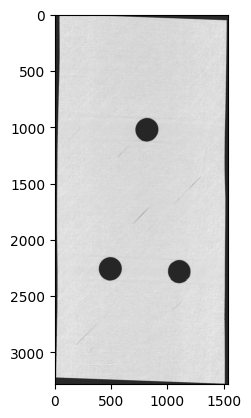

In [3]:
plt.imshow(volume[30], cmap='gray')

In [4]:
#axes of volume are (z, y, x)
#transform the volume to (x, y, z)
volume = np.transpose(volume, (2, 1, 0))
#axes of volume are (x, y, z)
#crop the volume to remove the walls

_,frontwall,backwall = aligner.crop_walls(volume)

#axes of cropped_volume are (x, y, z)
#transform the volume to (z, y, x)
volume = np.transpose(volume, (2, 1, 0))

print(frontwall, backwall)

computing otsu
9 174


# onlypores

In [5]:
from preprocess_tools import onlypores

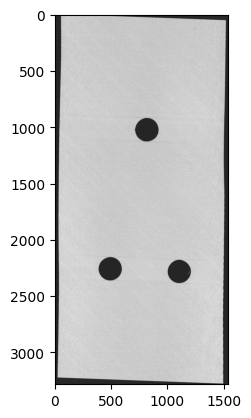

In [6]:
plt.imshow(volume[frontwall], cmap='gray')

In [7]:
onlypores_volume, sample_mask, binary = onlypores.onlypores(volume, frontwall, backwall)

masking
Cropped volume shape: (203, 3283, 1535)
Thresholding
True


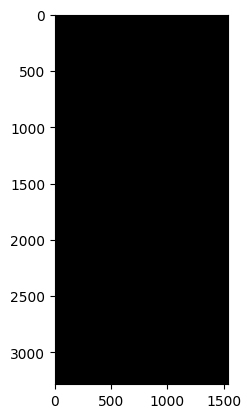

In [11]:
plt.imshow(binary[frontwall-1], cmap='gray')

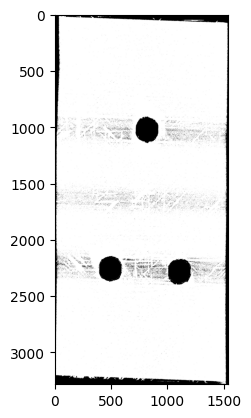

In [9]:
plt.imshow(onlypores_volume.max(axis=0), cmap='gray')